## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Loading the Train Data

In [253]:
train = pd.read_csv('train.csv')

In [254]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [255]:
## basic info about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [256]:
## shape of data
train.shape

(20758, 18)

In [257]:
## checking null values
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [258]:
## dropping id column
train.drop(columns=['id'],inplace=True)

In [259]:
## checking for duplicate rows
train.duplicated().sum()

0

## EDA

In [260]:
## creating a function for categorical variables
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    #f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    plt.figure(figsize=(11,7))
    ax=sns.countplot(data=data, x=x)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    
    plt.show()

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Male', 'Female']
Value count and %
         count  proportion
Gender                   
Female  10422    0.502071
Male    10336    0.497929


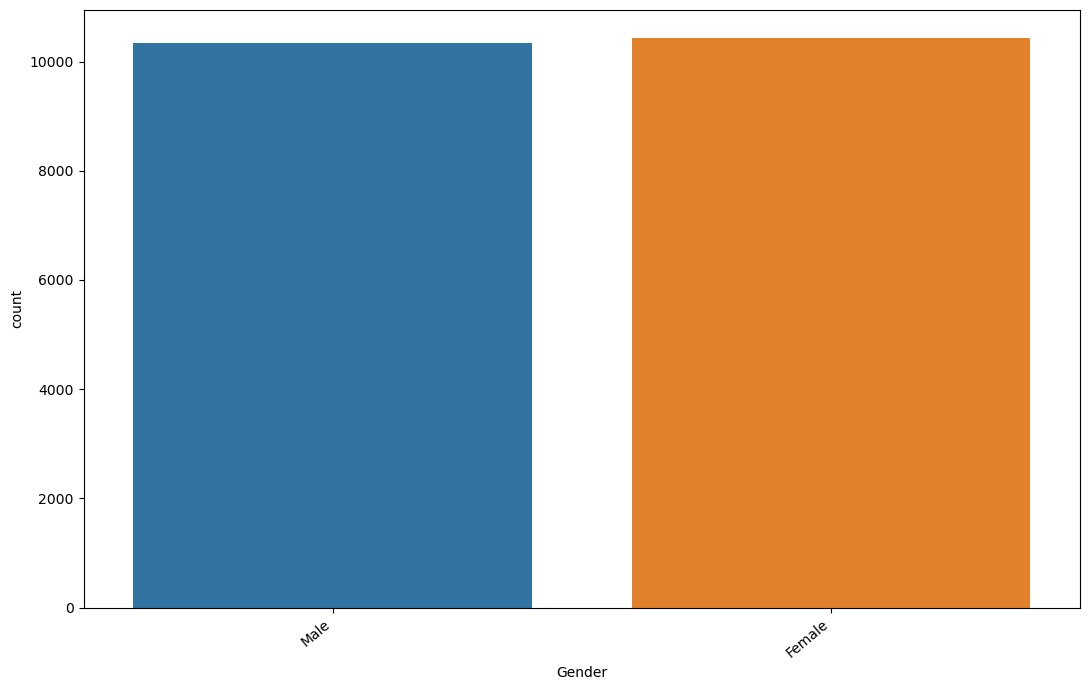

In [261]:
univariate_cat(train,'Gender')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
                                 count  proportion
family_history_with_overweight                   
yes                             17014    0.819636
no                               3744    0.180364


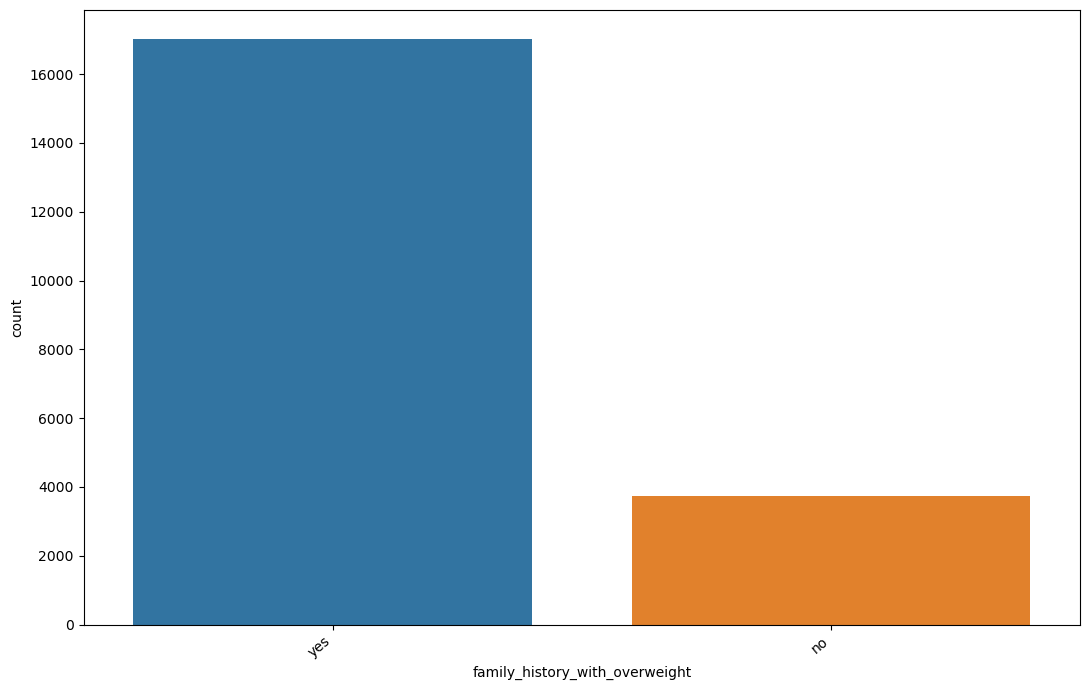

In [262]:
univariate_cat(train,'family_history_with_overweight')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
       count  proportion
FAVC                   
yes   18982    0.914443
no     1776    0.085557


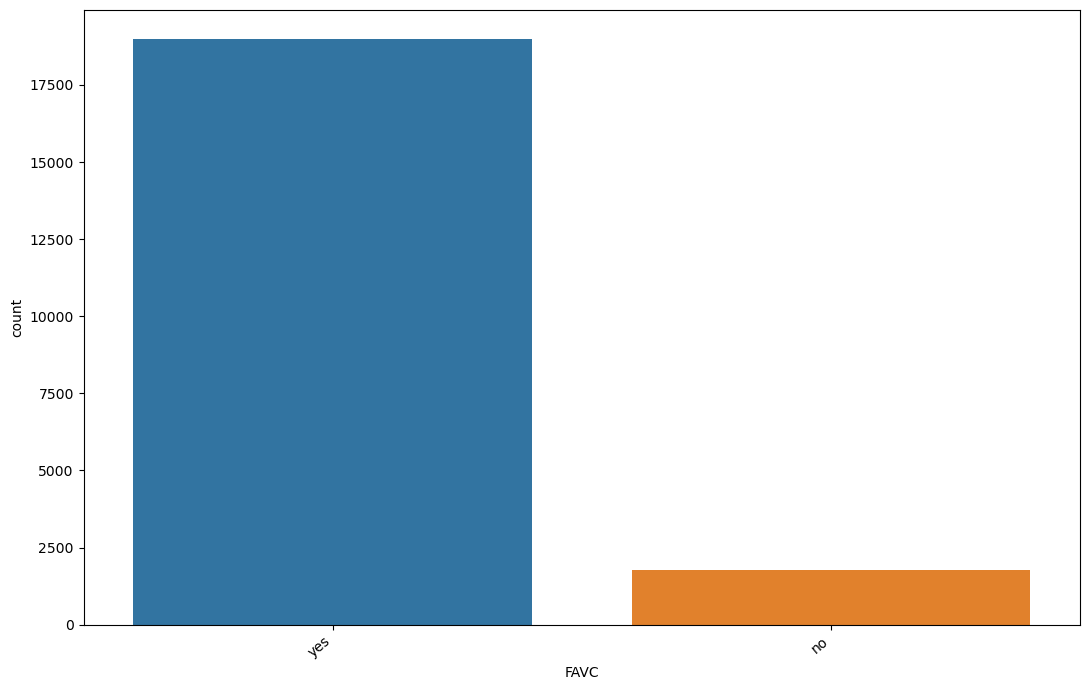

In [263]:
univariate_cat(train,'FAVC')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['Sometimes', 'Frequently', 'no', 'Always']
Value count and %
             count  proportion
CAEC                         
Sometimes   17529    0.844446
Frequently   2472    0.119087
Always        478    0.023027
no            279    0.013441


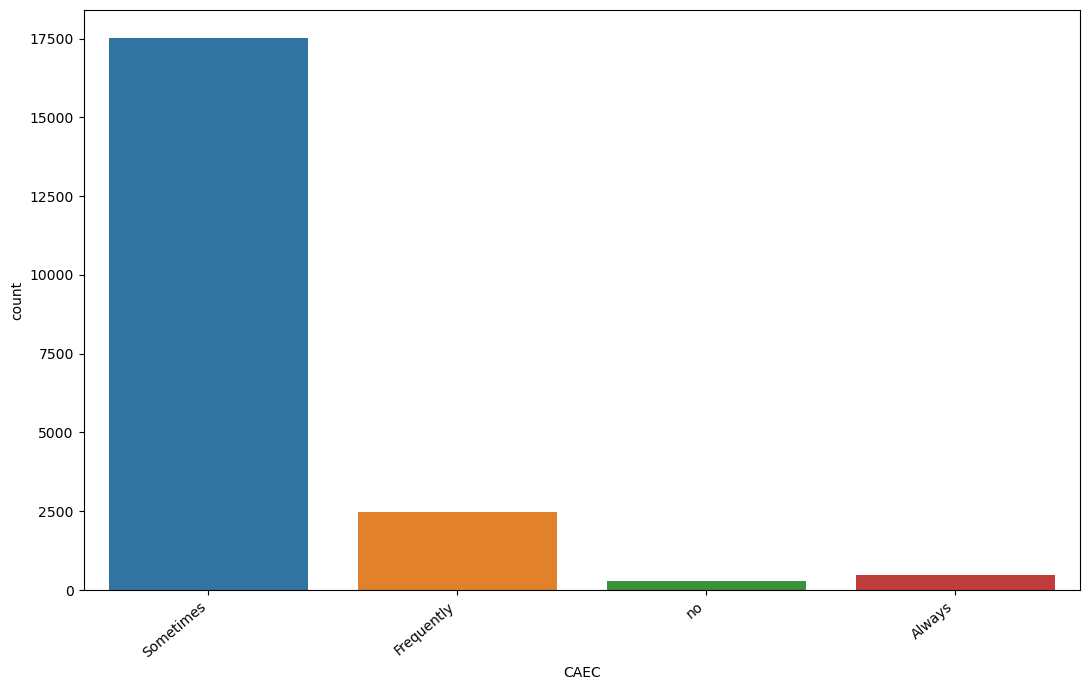

In [264]:
univariate_cat(train,'CAEC')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
        count  proportion
SMOKE                   
no     20513    0.988197
yes      245    0.011803


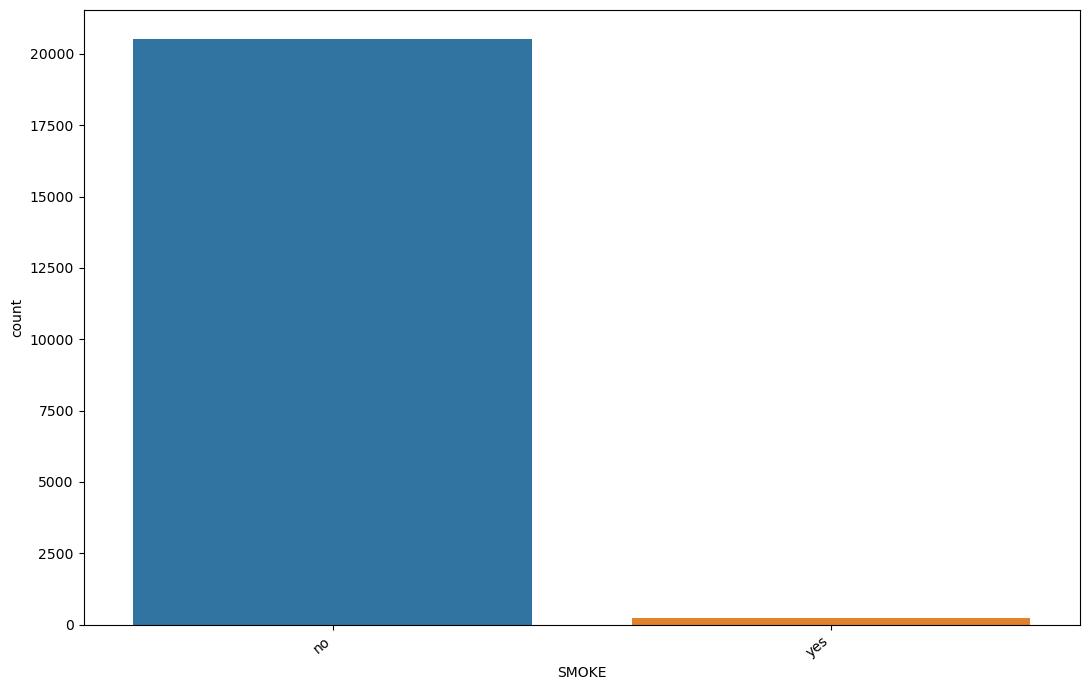

In [265]:
univariate_cat(train,'SMOKE')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      count  proportion
SCC                   
no   20071    0.966904
yes    687    0.033096


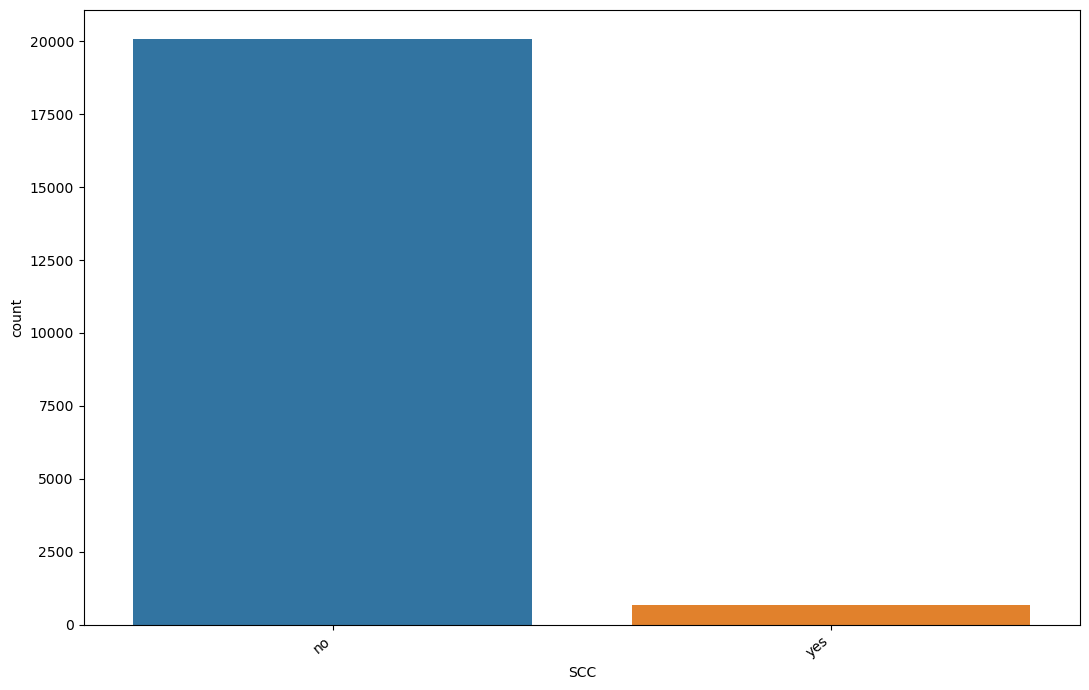

In [266]:
univariate_cat(train,'SCC')

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['Sometimes', 'no', 'Frequently']
Value count and %
             count  proportion
CALC                         
Sometimes   15066    0.725792
no           5163    0.248723
Frequently    529    0.025484


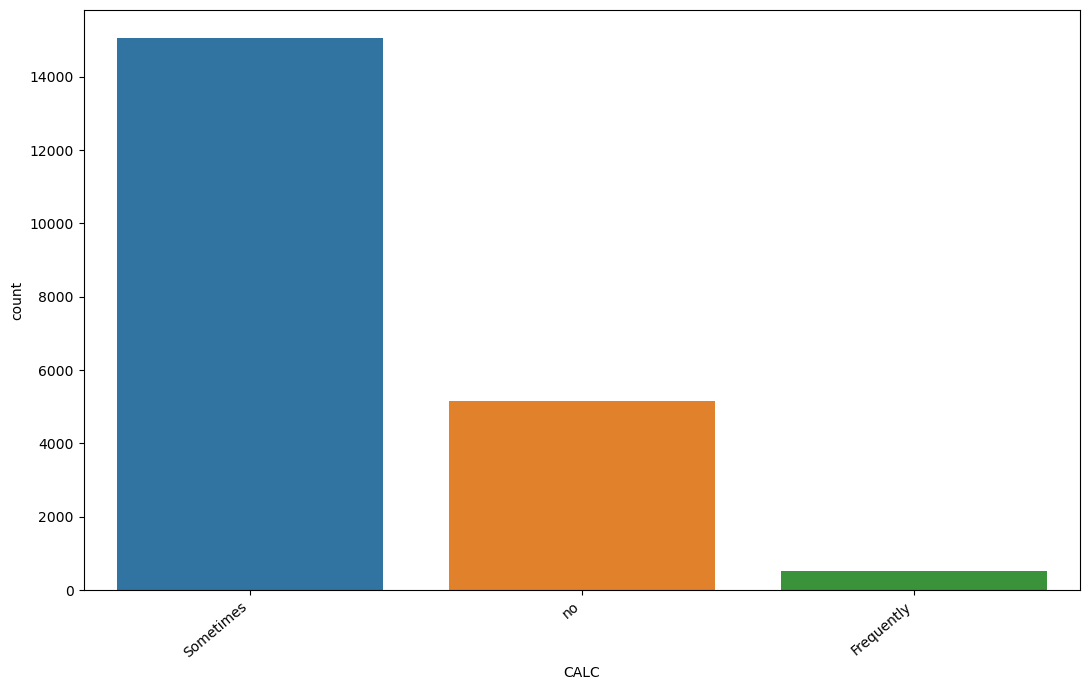

In [267]:
univariate_cat(train,'CALC')

Total missing values : 0

Total count of unique categories: 5

Unique categories :
['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']
Value count and %
                        count  proportion
MTRANS                                  
Public_Transportation  16687    0.803883
Automobile              3534    0.170248
Walking                  467    0.022497
Motorbike                 38    0.001831
Bike                      32    0.001542


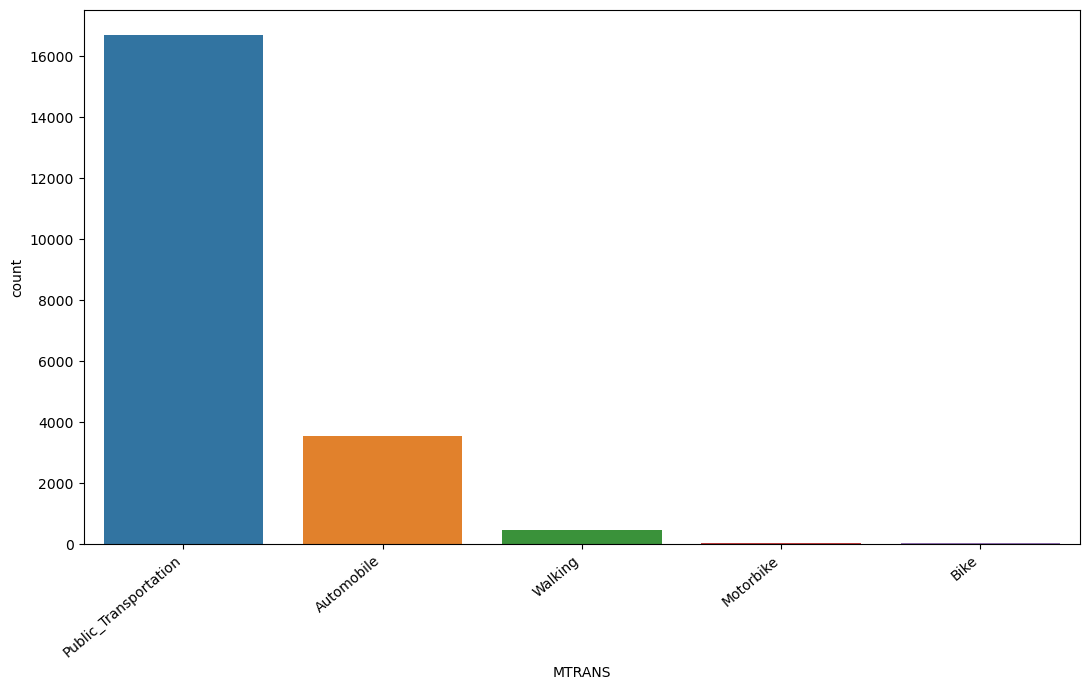

In [268]:
univariate_cat(train,'MTRANS')

Total missing values : 0

Total count of unique categories: 7

Unique categories :
['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I']
Value count and %
                      count  proportion
NObeyesdad                            
Obesity_Type_III      4046    0.194913
Obesity_Type_II       3248    0.156470
Normal_Weight         3082    0.148473
Obesity_Type_I        2910    0.140187
Insufficient_Weight   2523    0.121544
Overweight_Level_II   2522    0.121495
Overweight_Level_I    2427    0.116919


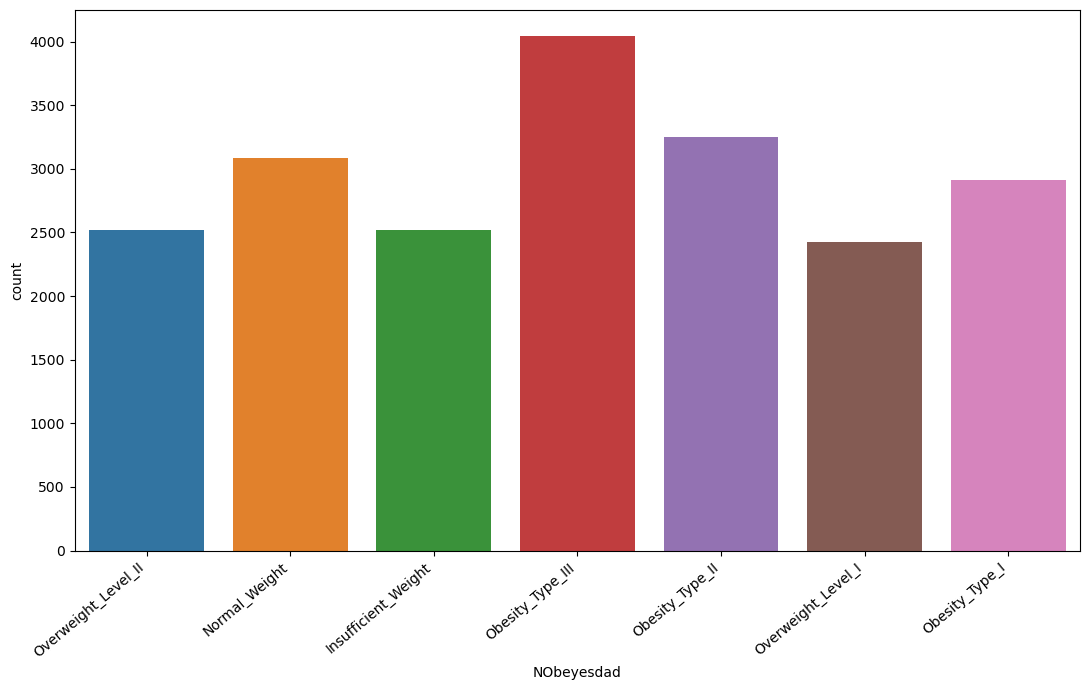

In [269]:
univariate_cat(train,'NObeyesdad')

In [270]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [271]:
## creating a function for numerical variables
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


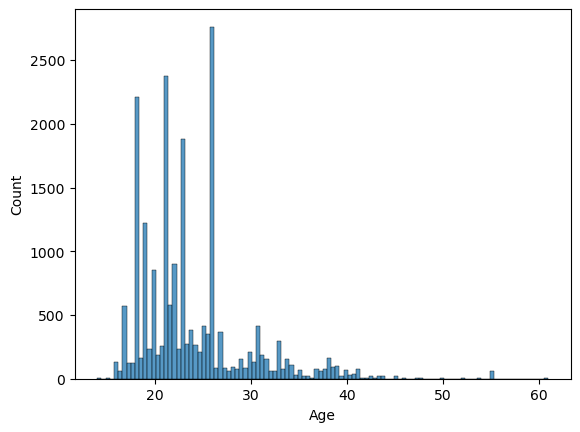

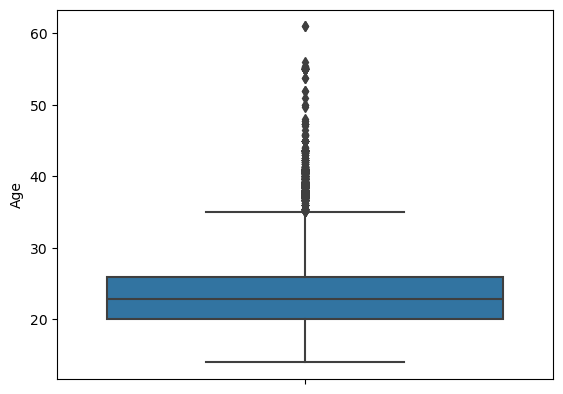

{'missing': 0,
 'min': 14.0,
 'max': 61.0,
 'mean': 23.84,
 'var': 32.35,
 'std': 5.69,
 'range': 47.0,
 'q1': 20.0,
 'q2': 22.82,
 'q3': 26.0,
 'skewness': 1.59,
 'kurtosis': 3.7}

In [272]:
univariate_num(train,'Age')

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


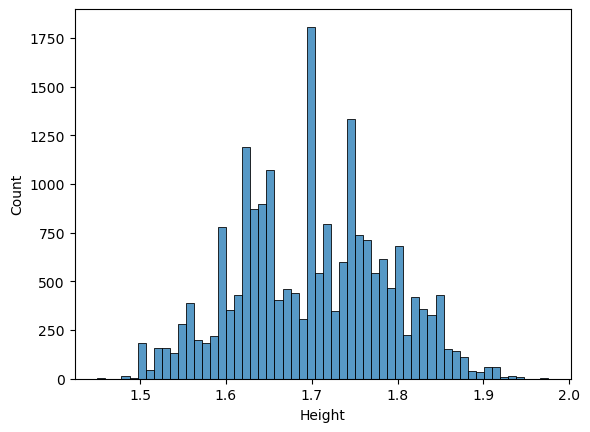

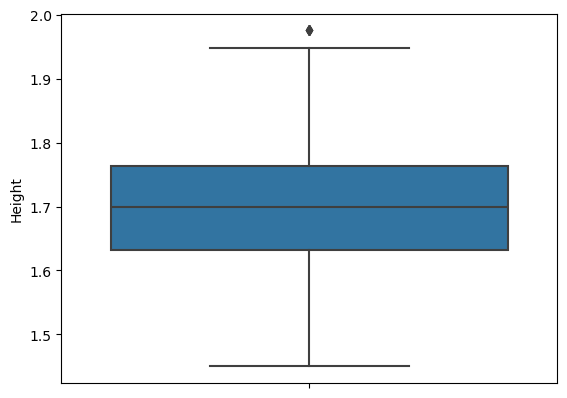

{'missing': 0,
 'min': 1.45,
 'max': 1.98,
 'mean': 1.7,
 'var': 0.01,
 'std': 0.09,
 'range': 0.53,
 'q1': 1.63,
 'q2': 1.7,
 'q3': 1.76,
 'skewness': 0.02,
 'kurtosis': -0.56}

In [273]:
univariate_num(train,'Height')

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


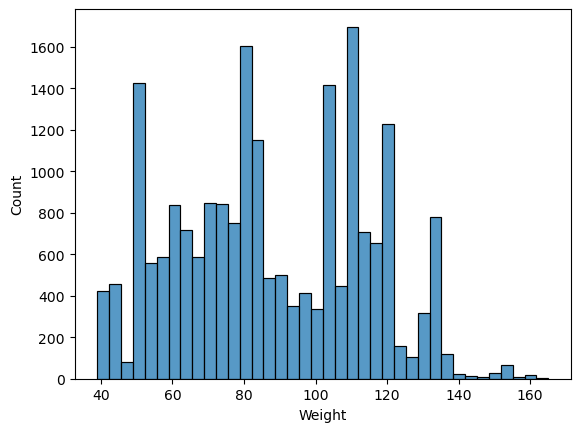

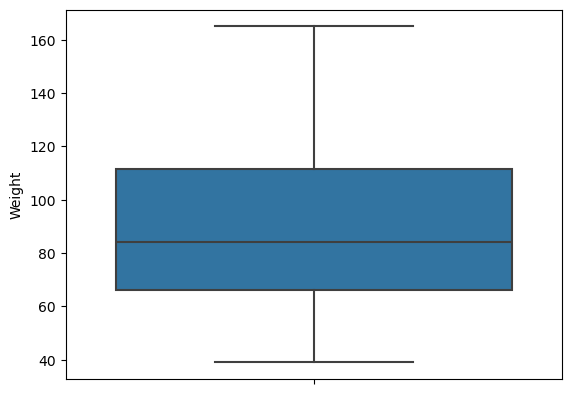

{'missing': 0,
 'min': 39.0,
 'max': 165.06,
 'mean': 87.89,
 'var': 695.88,
 'std': 26.38,
 'range': 126.06,
 'q1': 66.0,
 'q2': 84.06,
 'q3': 111.6,
 'skewness': 0.09,
 'kurtosis': -1.0}

In [274]:
univariate_num(train,'Weight')

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


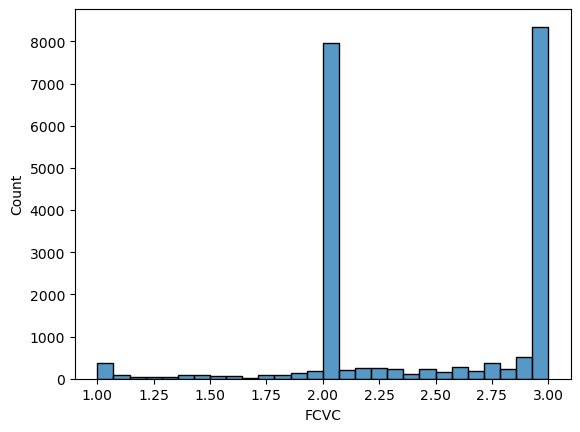

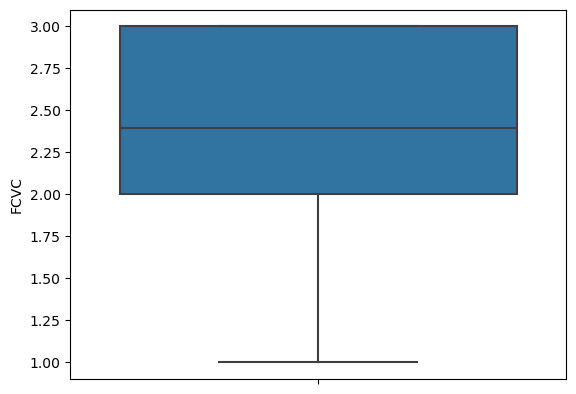

{'missing': 0,
 'min': 1.0,
 'max': 3.0,
 'mean': 2.45,
 'var': 0.28,
 'std': 0.53,
 'range': 2.0,
 'q1': 2.0,
 'q2': 2.39,
 'q3': 3.0,
 'skewness': -0.36,
 'kurtosis': -0.89}

In [275]:
univariate_num(train,'FCVC')

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


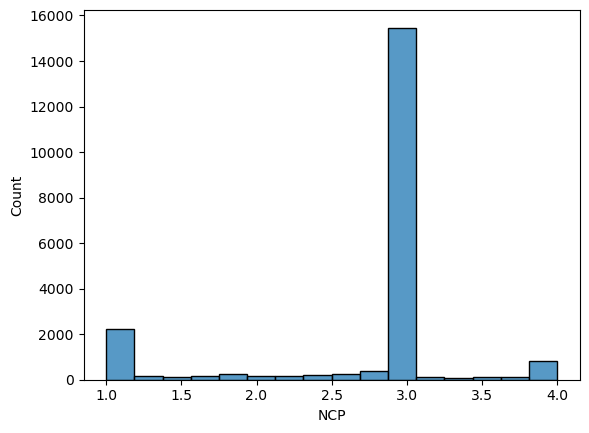

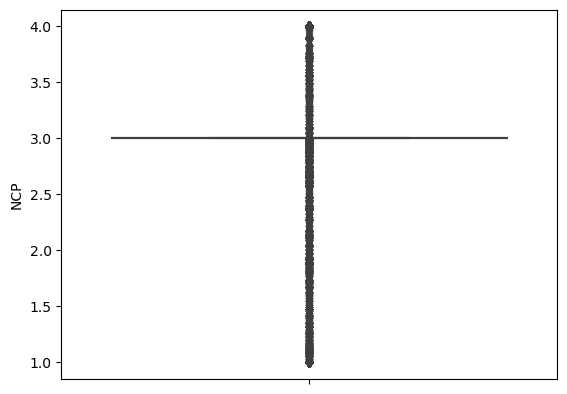

{'missing': 0,
 'min': 1.0,
 'max': 4.0,
 'mean': 2.76,
 'var': 0.5,
 'std': 0.71,
 'range': 3.0,
 'q1': 3.0,
 'q2': 3.0,
 'q3': 3.0,
 'skewness': -1.56,
 'kurtosis': 1.84}

In [276]:
univariate_num(train,'NCP')

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


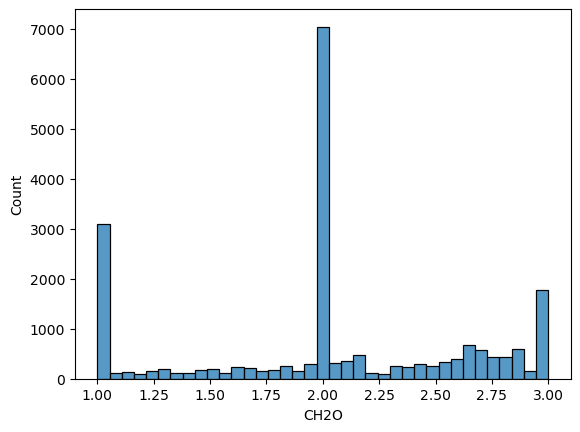

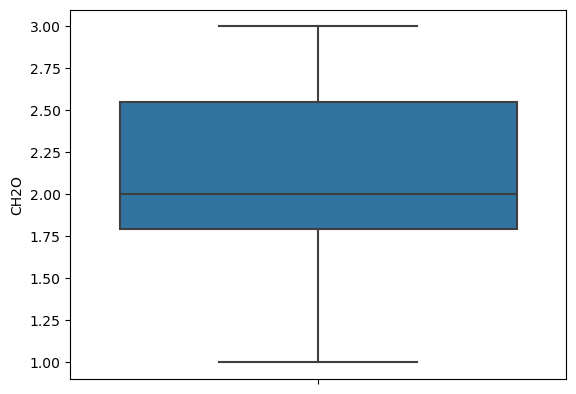

{'missing': 0,
 'min': 1.0,
 'max': 3.0,
 'mean': 2.03,
 'var': 0.37,
 'std': 0.61,
 'range': 2.0,
 'q1': 1.79,
 'q2': 2.0,
 'q3': 2.55,
 'skewness': -0.21,
 'kurtosis': -0.74}

In [277]:
univariate_num(train,'CH2O')

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


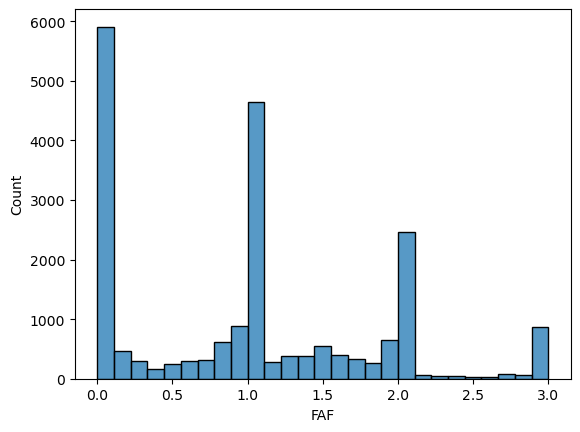

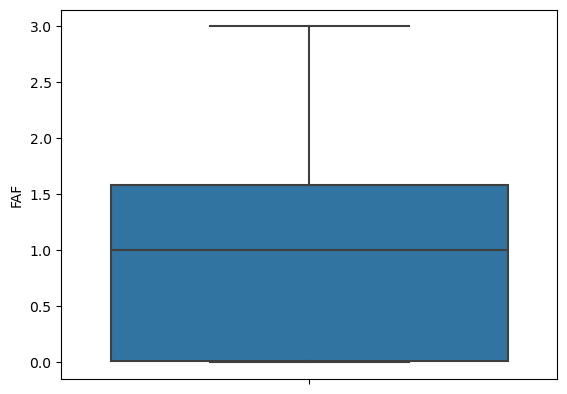

{'missing': 0,
 'min': 0.0,
 'max': 3.0,
 'mean': 0.98,
 'var': 0.7,
 'std': 0.84,
 'range': 3.0,
 'q1': 0.01,
 'q2': 1.0,
 'q3': 1.59,
 'skewness': 0.51,
 'kurtosis': -0.49}

In [278]:
univariate_num(train,'FAF')

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


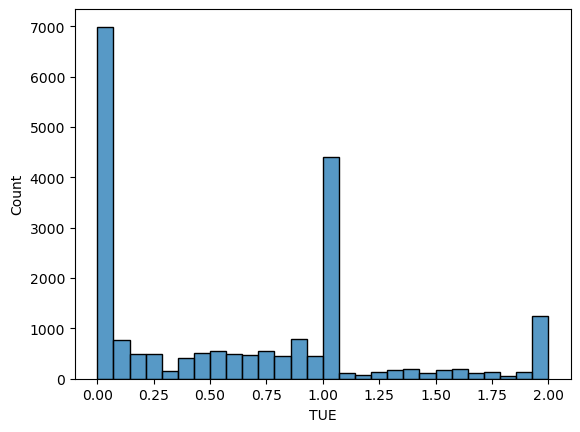

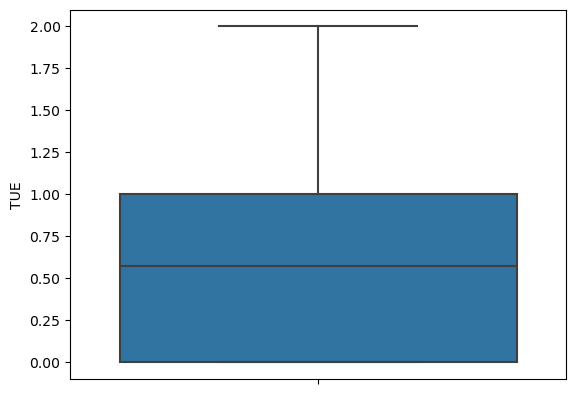

{'missing': 0,
 'min': 0.0,
 'max': 2.0,
 'mean': 0.62,
 'var': 0.36,
 'std': 0.6,
 'range': 2.0,
 'q1': 0.0,
 'q2': 0.57,
 'q3': 1.0,
 'skewness': 0.67,
 'kurtosis': -0.42}

In [279]:
univariate_num(train,'TUE')

In [280]:
## clipping the data to treat outliers
def myoutlier(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [281]:
train[['Age','NCP']] = train[['Age','NCP']].apply(myoutlier)

In [282]:
train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [283]:
train['NObeyesdad'] = train['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,
                                               'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})
                                        

In [284]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,3
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,6
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,3


## Standardizing the data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
columns_to_scale = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

In [36]:
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [37]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,0.121295,-0.002828,-0.235713,yes,yes,-0.836279,0.314684,Sometimes,no,1.206594,no,-1.171141,0.597438,Sometimes,Public_Transportation,3
1,Female,-1.068672,-1.606291,-1.170931,yes,yes,-0.836279,0.338364,Frequently,no,-0.048349,no,0.021775,0.636513,no,Automobile,1
2,Female,-1.068672,0.128451,-1.430012,yes,yes,-1.060332,-1.913423,Sometimes,no,-0.195644,no,-0.138022,1.755239,no,Public_Transportation,0
3,Female,-0.523328,0.120090,1.644770,yes,yes,1.039171,0.338364,Sometimes,no,-0.584035,no,0.579896,0.271455,Sometimes,Public_Transportation,6
4,Male,1.450714,2.450367,0.224054,yes,yes,0.438397,-1.119801,Sometimes,no,-0.081469,no,1.176486,0.523111,Sometimes,Public_Transportation,3


In [38]:
train['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [39]:
train1 = pd.get_dummies(train,dtype='int')

## Loading the test data

In [309]:
test = pd.read_csv('test.csv')

In [310]:
test.shape

(13840, 17)

In [90]:
test[['Age','NCP']] = test[['Age','NCP']].apply(myoutlier)

In [91]:
## standardizing the test data
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [92]:
test = pd.get_dummies(test,dtype='int')

In [93]:
test.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,20758,0.575057,1.695675,1.241770,0.924049,0.338364,1.308584,-0.150721,-1.024344,0,...,0,0,0,1,0,0,0,0,1,0
1,20759,-0.514599,-1.148152,-0.829748,-0.836279,-2.497077,1.595165,0.021775,-1.024344,1,...,0,0,0,1,0,0,0,0,1,0
2,20760,0.408857,-0.651587,0.898933,1.039171,0.338364,0.973714,-1.171141,-0.608296,1,...,0,0,0,1,0,0,0,0,1,0
3,20761,-0.518430,-1.685011,0.598259,-0.836279,0.307045,1.244138,-1.057992,-1.024344,0,...,0,0,0,1,0,0,0,0,1,0
4,20762,0.408857,-0.834373,0.642469,1.039171,0.338364,1.025738,-1.171141,0.206466,1,...,0,0,0,1,0,0,0,0,1,0


In [94]:
test.drop(columns=['CALC_Always'],inplace=True)

In [47]:
## Separating the dependent and independent variables
x = train1.drop(columns = ['NObeyesdad'])
y = train1['NObeyesdad']

## Train-Test-Split

In [48]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.25,stratify=y,random_state=0)

## Model Building

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

## Logistic Regression

In [50]:
lg = LogisticRegression(max_iter = 500)
lg.fit(x_train,y_train)

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [51]:
lg.score(x_train,y_train)

0.864915210688592

In [52]:
lg.score(x_test,y_test)

0.8660886319845857

In [53]:
from sklearn import metrics 

In [54]:
pred_train = lg.predict(x_train)
pred_test = lg.predict(x_test)

In [61]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1892
           1       0.86      0.81      0.83      2311
           2       0.74      0.70      0.72      1820
           3       0.72      0.71      0.72      1892
           4       0.82      0.83      0.82      2183
           5       0.93      0.96      0.95      2436
           6       0.99      1.00      1.00      3034

    accuracy                           0.86     15568
   macro avg       0.85      0.85      0.85     15568
weighted avg       0.86      0.86      0.86     15568



In [62]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       631
           1       0.84      0.83      0.83       771
           2       0.73      0.69      0.71       607
           3       0.73      0.70      0.71       630
           4       0.85      0.82      0.83       727
           5       0.93      0.98      0.95       812
           6       0.99      1.00      1.00      1012

    accuracy                           0.87      5190
   macro avg       0.85      0.85      0.85      5190
weighted avg       0.86      0.87      0.86      5190



In [57]:
lg.fit(x,y)

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [58]:
pred1 = lg.predict(test)

In [63]:
submission1 = pd.DataFrame(data=[test['id'],pred1]).T

In [64]:
submission1.columns=['id','NObeyesdad']

In [65]:
submission1

,id,NObeyesdad
0,20758,5
1,20759,2
2,20760,6
3,20761,4
4,20762,6
...,...,...
13835,34593,3
13836,34594,1
13837,34595,0
13838,34596,1


In [66]:
submission1['NObeyesdad'] = submission1['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})

In [67]:
submission1

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [ ]:
submission1.to_csv('submission1.csv',index=False)

## Decision Tree

In [68]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
dt.score(x_train,y_train)

1.0

In [70]:
dt.score(x_test,y_test)


0.8477842003853564

In [80]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[5,7,10,12,15,20,25],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
              'max_features':[1,2,3,4,5,6,7,8,9,10]
             }


In [81]:
## Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
rf = RandomizedSearchCV(estimator=dt,param_distributions=parameters,random_state=0)
rf.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [5, 7, 10, 12, 15,
                                                              20, 25]},
                   random_state=0)

In [82]:
rf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=8,
                       min_samples_leaf=5, min_samples_split=20)

In [83]:
rf.score(x_train,y_train)

0.8491135662898253

In [84]:
rf.score(x_test,y_test)

0.8354527938342967

In [99]:
rf.fit(x,y)
pred2 = rf.predict(test.drop(columns='id'))
submission2 = pd.DataFrame(data=[test['id'],pred2]).T
submission2.columns=['id','NObeyesdad']
submission2['NObeyesdad'] = submission2['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})

In [102]:
submission2

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_I
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [101]:
submission2.to_csv('submission2.csv',index=False)

In [103]:
dt.fit(x,y)
pred3 = dt.predict(test.drop(columns='id'))
submission3 = pd.DataFrame(data=[test['id'],pred3]).T
submission3.columns=['id','NObeyesdad']
submission3['NObeyesdad'] = submission3['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission3

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Normal_Weight
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [104]:
submission3.to_csv('submission3.csv',index=False)

## Random forest

In [105]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
rf.score(x_train,y_train)

1.0

In [108]:
rf.score(x_test,y_test)

0.8901734104046243

In [109]:
rf.fit(x,y)
pred4 = rf.predict(test.drop(columns='id'))
submission4 = pd.DataFrame(data=[test['id'],pred4]).T
submission4.columns=['id','NObeyesdad']
submission4['NObeyesdad'] = submission4['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission4

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [110]:
submission4.to_csv('submission4.csv',index=False)

## Random Forest with Hyperparameter Tuning

In [131]:
params=   {"criterion":["gini","entropy"],
           "max_depth":[9,11,13,15,17,20,25],
           "min_samples_split":[8,10,15,20,22,25],
           "min_samples_leaf":[1,2,5,8,10],
           "n_estimators":[300,350,400,450,500,550,600,650,700],
           "bootstrap":[True],
           "max_features":["sqrt","log2"],
           "max_samples":[.5,.6,.75,.8,.9]}

In [132]:
rs = RandomizedSearchCV(rf,param_distributions=params ,random_state=0)
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17, 20,
                                                      25],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.5, 0.6, 0.75, 0.8,
                                                        0.9],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [8, 10, 15, 20, 22,
                                                              25],
                                        'n_estimators': [300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700]},
                   random_state=0)

In [133]:
rs.best_estimator_

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=650)

In [134]:
rs.best_score_

0.8897740244826583

In [135]:
rs.score(x_train,y_train)

0.9481628982528263

In [136]:
rs.score(x_test,y_test)

0.8915221579961464

In [137]:
rs.fit(x,y)
pred5 = rs.predict(test.drop(columns='id'))
submission5 = pd.DataFrame(data=[test['id'],pred5]).T
submission5.columns=['id','NObeyesdad']
submission5['NObeyesdad'] = submission5['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission5

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [138]:
submission5.to_csv('submission5.csv',index=False)

##  KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [156]:
knn.score(x_train,y_train)

0.8325411099691675

In [157]:
knn.score(x_test,y_test)


0.7647398843930636

In [158]:
knn.fit(x,y)
pred6 = knn.predict(test.drop(columns='id'))
submission6 = pd.DataFrame(data=[test['id'],pred6]).T
submission6.columns=['id','NObeyesdad']
submission6['NObeyesdad'] = submission6['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission6

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Obesity_Type_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_I
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Overweight_Level_II


In [159]:
submission6.to_csv('submission6.csv',index=False)


## Extra Tree

In [160]:
from sklearn.tree import ExtraTreeClassifier

In [161]:
et = ExtraTreeClassifier()
et.fit(x_train,y_train)

ExtraTreeClassifier()

In [162]:
et.score(x_train,y_train)

1.0

In [163]:
et.score(x_test,y_test)

0.761271676300578

In [171]:
## Hyperparameter Tuning
params=   {"criterion":["gini","entropy"],
           "splitter" : ["random", "best"],
           "max_depth":[9,11,13,15,17,20,25],
           "min_samples_split":[8,10,15,20,22,25],
           "min_samples_leaf":[1,2,5,8,10],
           "max_features":["sqrt","log2"]}

In [172]:
rs = RandomizedSearchCV(et,param_distributions=params ,random_state=0)
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=ExtraTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17, 20,
                                                      25],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [8, 10, 15, 20, 22,
                                                              25],
                                        'splitter': ['random', 'best']},
                   random_state=0)

In [173]:
rs.best_estimator_

ExtraTreeClassifier(max_depth=25, min_samples_leaf=8, min_samples_split=20,
                    splitter='best')

In [174]:
rs.score(x_train,y_train)

0.861896197327852

In [175]:
rs.score(x_test,y_test)


0.8289017341040462

In [176]:
rs.fit(x,y)
pred7 = rs.predict(test.drop(columns='id'))
submission7 = pd.DataFrame(data=[test['id'],pred7]).T
submission7.columns=['id','NObeyesdad']
submission7['NObeyesdad'] = submission7['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission7

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Normal_Weight
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Insufficient_Weight


In [177]:
submission7.to_csv('submission7.csv',index=False)


In [221]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb

In [ ]:
params=   {"criterion":['friedman_mse', 'squared_error'],
           "loss" : {'log_loss', 'deviance', 'exponential'},
           "learning_rate" : [0.1,0.2,0.5,0.8,0.01,0.02,0.05,0.08],
           "subsample" : [0.5,0.7,0.9,1]
           "max_depth":[5,7,9,11,13,15,17,20,25],
           "min_samples_split":[8,10,15,20,22,25],
           "min_samples_leaf":[1,2,5,8,10],
           "n_estimators":[100,200,300,350,400,450,500,550,600,650,700],
           "max_features":["sqrt","log2"],
           "max_samples":[.5,.6,.75,.8,.9]}

## Gradient Boosting

In [179]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [180]:
gb.score(x_train,y_train)

0.9233684480986639

In [181]:
gb.score(x_test,y_test)


0.9067437379576108

In [182]:
gb.fit(x,y)
pred8 = gb.predict(test.drop(columns='id'))
submission8 = pd.DataFrame(data=[test['id'],pred8]).T
submission8.columns=['id','NObeyesdad']
submission8['NObeyesdad'] = submission8['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission8

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [183]:
submission8.to_csv('submission8.csv',index=False)


## Gradient Boosting with Hyperparameter Tuning

In [197]:
params=   {"criterion":['friedman_mse', 'squared_error'],
           "loss" : ['log_loss','exponential'],
           "learning_rate" : [0.1,0.2,0.5,0.8,0.01,0.02,0.05,0.08],
           "subsample" : [0.5,0.7,0.9,1],
           "max_depth":[9,11,13,15,17,20,25],
           "min_samples_split":[8,10,15,20,22,25],
           "min_samples_leaf":[1,2,5,8,10],
           "n_estimators":[200,300,350,400,500,600700],
           "max_features":["sqrt","log2"]}

In [198]:
rs = RandomizedSearchCV(gb,param_distributions=params ,random_state=0)
rs.fit(x_train,y_train)

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 444, in fit
    self._check_params()
  File "C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 301, in _check_params
    self._loss = loss_class(self.n_classes_)
                 ^

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          0.01, 0.02, 0.05,
                                                          0.08],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      20, 25],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [8, 10, 15, 20, 22,
                                                              25],
                                        'n_estimators': [200, 300, 350, 400,
                                                         450, 500, 550, 600,
                                                         650, 700, 750],
                                        'subsample': [0.5, 0.7, 0.9, 1]},
                   random_state=0)

In [199]:
rs.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=20,
                           max_features='sqrt', min_samples_leaf=5,
                           min_samples_split=8, n_estimators=350,
                           subsample=0.7)

In [200]:
rs.best_score_

0.8968401719765104

In [201]:
rs.score(x_train,y_train)

1.0

In [202]:
rs.score(x_test,y_test)

0.8973025048169557

In [203]:
rs.fit(x,y)
pred9 = rs.predict(test.drop(columns='id'))
submission9 = pd.DataFrame(data=[test['id'],pred9]).T
submission9.columns=['id','NObeyesdad']
submission9['NObeyesdad'] = submission9['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission9

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 444, in fit
    self._check_params()
  File "C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 301, in _check_params
    self._loss = loss_class(self.n_classes_)
                 ^

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [204]:
submission9.to_csv('submission9.csv',index=False)

## AdaBoost

In [212]:
ab = AdaBoostClassifier(random_state=0)
ab.fit(x_train,y_train)

AdaBoostClassifier(random_state=0)

In [213]:
ab.score(x_train,y_train)

0.4204136690647482

In [214]:
ab.score(x_test,y_test)

0.4279383429672447

## XGBoost

In [236]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(x_train,y_train,eval_set=[(x_test, y_test)])

[0]	validation_0-mlogloss:1.24656
[1]	validation_0-mlogloss:0.96219
[2]	validation_0-mlogloss:0.78653
[3]	validation_0-mlogloss:0.66393
[4]	validation_0-mlogloss:0.57833
[5]	validation_0-mlogloss:0.51247
[6]	validation_0-mlogloss:0.46332
[7]	validation_0-mlogloss:0.42462
[8]	validation_0-mlogloss:0.39744
[9]	validation_0-mlogloss:0.37558
[10]	validation_0-mlogloss:0.35941
[11]	validation_0-mlogloss:0.34237
[12]	validation_0-mlogloss:0.32970
[13]	validation_0-mlogloss:0.32014
[14]	validation_0-mlogloss:0.31209
[15]	validation_0-mlogloss:0.30584
[16]	validation_0-mlogloss:0.30096
[17]	validation_0-mlogloss:0.29645
[18]	validation_0-mlogloss:0.29277
[19]	validation_0-mlogloss:0.28985
[20]	validation_0-mlogloss:0.28765
[21]	validation_0-mlogloss:0.28492
[22]	validation_0-mlogloss:0.28275
[23]	validation_0-mlogloss:0.28094
[24]	validation_0-mlogloss:0.27944
[25]	validation_0-mlogloss:0.27815
[26]	validation_0-mlogloss:0.27669
[27]	validation_0-mlogloss:0.27588
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [237]:
xg.score(x_train,y_train)

0.9899794450154162

In [238]:
xg.score(x_test,y_test)

0.9036608863198459

In [218]:
xgb.fit(x,y)
pred11 = xgb.predict(test.drop(columns='id'))
submission11 = pd.DataFrame(data=[test['id'],pred11]).T
submission11.columns=['id','NObeyesdad']
submission11['NObeyesdad'] = submission11['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission11

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [219]:
submission11.to_csv('submission11.csv',index=False)

## XGBoost with Hyperparameter Tuning

In [244]:
params = {
          'booster':['gbtree','gblinear','dart'],
          'min_child_weight': [1, 5, 10],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'max_depth': [3, 4, 5,7],
          'eta' : [0.1,0.2,0.5,0.8,0.01,0.02,0.05,0.08],
          'eval_metric' : ['merror']
         }

In [245]:
xg = xgb.XGBClassifier(objective='multi: softmax',)
rs = RandomizedSearchCV(xg,param_distributions=params,random_state=0)
rs.fit(x_train,y_train,eval_set=[(x_test, y_test)])

[0]	validation_0-merror:0.16782
[1]	validation_0-merror:0.15703
[2]	validation_0-merror:0.13526
[3]	validation_0-merror:0.12755
[4]	validation_0-merror:0.12235
[5]	validation_0-merror:0.12235
[6]	validation_0-merror:0.11715
[7]	validation_0-merror:0.11426
[8]	validation_0-merror:0.11310
[9]	validation_0-merror:0.11368
[10]	validation_0-merror:0.11002
[11]	validation_0-merror:0.10906
[12]	validation_0-merror:0.10848
[13]	validation_0-merror:0.10597
[14]	validation_0-merror:0.10539
[15]	validation_0-merror:0.10539
[16]	validation_0-merror:0.10501
[17]	validation_0-merror:0.10405
[18]	validation_0-merror:0.10289
[19]	validation_0-merror:0.10347
[20]	validation_0-merror:0.10308
[21]	validation_0-merror:0.10385
[22]	validation_0-merror:0.10289
[23]	validation_0-merror:0.10250
[24]	validation_0-merror:0.10135
[25]	validation_0-merror:0.10289
[26]	validation_0-merror:0.10270
[27]	validation_0-merror:0.10231
[28]	validation_0-merror:0.10308
[29]	validation_0-merror:0.10250
[30]	validation_0-me

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation_0-merror:0.33642
[4]	validation_0-merror:0.32582
[5]	validation_0-merror:0.31773
[6]	validation_0-merror:0.31098
[7]	validation_0-merror:0.30250
[8]	validation_0-merror:0.29538
[9]	validation_0-merror:0.28825
[10]	validation_0-merror:0.28382
[11]	validation_0-merror:0.27746
[12]	validation_0-merror:0.27225
[13]	validation_0-merror:0.26802
[14]	validation_0-merror:0.26474
[15]	validation_0-merror:0.25973
[16]	validation_0-merror:0.25607
[17]	validation_0-merror:0.25067
[18]	validation_0-merror:0.24798
[19]	validation_0-merror:0.24451
[20]	validation_0-merror:0.24220
[21]	validation_0-merror:0.23931
[22]	validation_0-merror:0.23719
[23]	validation_0-merror:0.23487
[24]	validation_0-merror:0.23314
[25]	validation_0-merror:0.22929
[26]	validation_0-merror:0.22755
[27]	validation_0-merror:0.22601
[28]	validation_0-merror:0.22331
[29]	validation_0-merror:0.22177
[30]	validation_0-merror:0.21869
[31]	validation_0-merror:0.21753
[32]	validation_0-merror:0.21541
[33]	validation_0

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation_0-merror:0.32697
[5]	validation_0-merror:0.31541
[6]	validation_0-merror:0.30539
[7]	validation_0-merror:0.29769
[8]	validation_0-merror:0.29094
[9]	validation_0-merror:0.28651
[10]	validation_0-merror:0.27900
[11]	validation_0-merror:0.27476
[12]	validation_0-merror:0.26859
[13]	validation_0-merror:0.26416
[14]	validation_0-merror:0.25877
[15]	validation_0-merror:0.25279
[16]	validation_0-merror:0.24990
[17]	validation_0-merror:0.24798
[18]	validation_0-merror:0.24489
[19]	validation_0-merror:0.24258
[20]	validation_0-merror:0.24008
[21]	validation_0-merror:0.23699
[22]	validation_0-merror:0.23410
[23]	validation_0-merror:0.23218
[24]	validation_0-merror:0.23006
[25]	validation_0-merror:0.22794
[26]	validation_0-merror:0.22524
[27]	validation_0-merror:0.22293
[28]	validation_0-merror:0.22081
[29]	validation_0-merror:0.21830
[30]	validation_0-merror:0.21792
[31]	validation_0-merror:0.21561
[32]	validation_0-merror:0.21426
[33]	validation_0-merror:0.21329
[34]	validation_

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.30250
[8]	validation_0-merror:0.29364
[9]	validation_0-merror:0.28536
[10]	validation_0-merror:0.28035
[11]	validation_0-merror:0.27360
[12]	validation_0-merror:0.26917
[13]	validation_0-merror:0.26551
[14]	validation_0-merror:0.26146
[15]	validation_0-merror:0.25838
[16]	validation_0-merror:0.25414
[17]	validation_0-merror:0.24913
[18]	validation_0-merror:0.24624
[19]	validation_0-merror:0.24297
[20]	validation_0-merror:0.24104
[21]	validation_0-merror:0.23911
[22]	validation_0-merror:0.23622
[23]	validation_0-merror:0.23391
[24]	validation_0-merror:0.22948
[25]	validation_0-merror:0.22736
[26]	validation_0-merror:0.22524
[27]	validation_0-merror:0.22216
[28]	validation_0-merror:0.22081
[29]	validation_0-merror:0.21908
[30]	validation_0-merror:0.21715
[31]	validation_0-merror:0.21561
[32]	validation_0-merror:0.21407
[33]	validation_0-merror:0.21349
[34]	validation_0-merror:0.21233
[35]	validation_0-merror:0.21175
[36]	validation_0-merror:0.21060
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation_0-merror:0.31715
[6]	validation_0-merror:0.30790
[7]	validation_0-merror:0.30039
[8]	validation_0-merror:0.29094
[9]	validation_0-merror:0.28285
[10]	validation_0-merror:0.27842
[11]	validation_0-merror:0.27514
[12]	validation_0-merror:0.26917
[13]	validation_0-merror:0.26513
[14]	validation_0-merror:0.25838
[15]	validation_0-merror:0.25434
[16]	validation_0-merror:0.24933
[17]	validation_0-merror:0.24701
[18]	validation_0-merror:0.24393
[19]	validation_0-merror:0.24181
[20]	validation_0-merror:0.23892
[21]	validation_0-merror:0.23661
[22]	validation_0-merror:0.23391
[23]	validation_0-merror:0.23141
[24]	validation_0-merror:0.22948
[25]	validation_0-merror:0.22852
[26]	validation_0-merror:0.22697
[27]	validation_0-merror:0.22428
[28]	validation_0-merror:0.22158
[29]	validation_0-merror:0.22081
[30]	validation_0-merror:0.21753
[31]	validation_0-merror:0.21599
[32]	validation_0-merror:0.21426
[33]	validation_0-merror:0.21214
[34]	validation_0-merror:0.21079
[35]	validation

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-merror:0.35414
[3]	validation_0-merror:0.34008
[4]	validation_0-merror:0.33102
[5]	validation_0-merror:0.32023
[6]	validation_0-merror:0.31098
[7]	validation_0-merror:0.30154
[8]	validation_0-merror:0.29383
[9]	validation_0-merror:0.28767
[10]	validation_0-merror:0.28092
[11]	validation_0-merror:0.27553
[12]	validation_0-merror:0.26956
[13]	validation_0-merror:0.26532
[14]	validation_0-merror:0.26089
[15]	validation_0-merror:0.25472
[16]	validation_0-merror:0.24990
[17]	validation_0-merror:0.24528
[18]	validation_0-merror:0.24258
[19]	validation_0-merror:0.24143
[20]	validation_0-merror:0.23892
[21]	validation_0-merror:0.23661
[22]	validation_0-merror:0.23526
[23]	validation_0-merror:0.23256
[24]	validation_0-merror:0.23083
[25]	validation_0-merror:0.22813
[26]	validation_0-merror:0.22659
[27]	validation_0-merror:0.22447
[28]	validation_0-merror:0.22293
[29]	validation_0-merror:0.22177
[30]	validation_0-merror:0.21908
[31]	validation_0-merror:0.21811
[32]	validation_0-

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.27052
[8]	validation_0-merror:0.26416
[9]	validation_0-merror:0.25491
[10]	validation_0-merror:0.24875
[11]	validation_0-merror:0.24489
[12]	validation_0-merror:0.24123
[13]	validation_0-merror:0.23757
[14]	validation_0-merror:0.23218
[15]	validation_0-merror:0.22697
[16]	validation_0-merror:0.22601
[17]	validation_0-merror:0.22158
[18]	validation_0-merror:0.21927
[19]	validation_0-merror:0.21696
[20]	validation_0-merror:0.21503
[21]	validation_0-merror:0.21310
[22]	validation_0-merror:0.21252
[23]	validation_0-merror:0.20944
[24]	validation_0-merror:0.20809
[25]	validation_0-merror:0.20674
[26]	validation_0-merror:0.20482
[27]	validation_0-merror:0.20308
[28]	validation_0-merror:0.20154
[29]	validation_0-merror:0.19942
[30]	validation_0-merror:0.19807
[31]	validation_0-merror:0.19595
[32]	validation_0-merror:0.19383
[33]	validation_0-merror:0.19210
[34]	validation_0-merror:0.19037
[35]	validation_0-merror:0.18940
[36]	validation_0-merror:0.18805
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-merror:0.26089
[9]	validation_0-merror:0.25260
[10]	validation_0-merror:0.24547
[11]	validation_0-merror:0.24220
[12]	validation_0-merror:0.23738
[13]	validation_0-merror:0.23410
[14]	validation_0-merror:0.23141
[15]	validation_0-merror:0.22678
[16]	validation_0-merror:0.22312
[17]	validation_0-merror:0.21985
[18]	validation_0-merror:0.21830
[19]	validation_0-merror:0.21618
[20]	validation_0-merror:0.21233
[21]	validation_0-merror:0.21175
[22]	validation_0-merror:0.21021
[23]	validation_0-merror:0.20925
[24]	validation_0-merror:0.20636
[25]	validation_0-merror:0.20385
[26]	validation_0-merror:0.20231
[27]	validation_0-merror:0.19904
[28]	validation_0-merror:0.19711
[29]	validation_0-merror:0.19538
[30]	validation_0-merror:0.19480
[31]	validation_0-merror:0.19133
[32]	validation_0-merror:0.19075
[33]	validation_0-merror:0.18921
[34]	validation_0-merror:0.18844
[35]	validation_0-merror:0.18767
[36]	validation_0-merror:0.18555
[37]	validation_0-merror:0.18401
[38]	validat

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.26782
[8]	validation_0-merror:0.25973
[9]	validation_0-merror:0.25260
[10]	validation_0-merror:0.24624
[11]	validation_0-merror:0.24355
[12]	validation_0-merror:0.23950
[13]	validation_0-merror:0.23487
[14]	validation_0-merror:0.23044
[15]	validation_0-merror:0.22601
[16]	validation_0-merror:0.22216
[17]	validation_0-merror:0.22081
[18]	validation_0-merror:0.21638
[19]	validation_0-merror:0.21426
[20]	validation_0-merror:0.21252
[21]	validation_0-merror:0.21021
[22]	validation_0-merror:0.20848
[23]	validation_0-merror:0.20732
[24]	validation_0-merror:0.20501
[25]	validation_0-merror:0.20212
[26]	validation_0-merror:0.20019
[27]	validation_0-merror:0.19942
[28]	validation_0-merror:0.19807
[29]	validation_0-merror:0.19769
[30]	validation_0-merror:0.19576
[31]	validation_0-merror:0.19383
[32]	validation_0-merror:0.19152
[33]	validation_0-merror:0.18979
[34]	validation_0-merror:0.18671
[35]	validation_0-merror:0.18709
[36]	validation_0-merror:0.18497
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.26532
[8]	validation_0-merror:0.25549
[9]	validation_0-merror:0.24913
[10]	validation_0-merror:0.24451
[11]	validation_0-merror:0.24220
[12]	validation_0-merror:0.23854
[13]	validation_0-merror:0.23314
[14]	validation_0-merror:0.23064
[15]	validation_0-merror:0.22813
[16]	validation_0-merror:0.22389
[17]	validation_0-merror:0.22004
[18]	validation_0-merror:0.21753
[19]	validation_0-merror:0.21387
[20]	validation_0-merror:0.21156
[21]	validation_0-merror:0.21175
[22]	validation_0-merror:0.20829
[23]	validation_0-merror:0.20655
[24]	validation_0-merror:0.20405
[25]	validation_0-merror:0.20193
[26]	validation_0-merror:0.20039
[27]	validation_0-merror:0.19807
[28]	validation_0-merror:0.19750
[29]	validation_0-merror:0.19518
[30]	validation_0-merror:0.19461
[31]	validation_0-merror:0.19383
[32]	validation_0-merror:0.19210
[33]	validation_0-merror:0.19075
[34]	validation_0-merror:0.18921
[35]	validation_0-merror:0.18748
[36]	validation_0-merror:0.18651
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.27013
[8]	validation_0-merror:0.25934
[9]	validation_0-merror:0.25106
[10]	validation_0-merror:0.24586
[11]	validation_0-merror:0.24008
[12]	validation_0-merror:0.23661
[13]	validation_0-merror:0.23314
[14]	validation_0-merror:0.22987
[15]	validation_0-merror:0.22794
[16]	validation_0-merror:0.22351
[17]	validation_0-merror:0.22062
[18]	validation_0-merror:0.21696
[19]	validation_0-merror:0.21561
[20]	validation_0-merror:0.21233
[21]	validation_0-merror:0.20886
[22]	validation_0-merror:0.20674
[23]	validation_0-merror:0.20617
[24]	validation_0-merror:0.20424
[25]	validation_0-merror:0.20193
[26]	validation_0-merror:0.20000
[27]	validation_0-merror:0.19846
[28]	validation_0-merror:0.19750
[29]	validation_0-merror:0.19692
[30]	validation_0-merror:0.19518
[31]	validation_0-merror:0.19403
[32]	validation_0-merror:0.19326
[33]	validation_0-merror:0.19191
[34]	validation_0-merror:0.18998
[35]	validation_0-merror:0.18882
[36]	validation_0-merror:0.18709
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.37977
[8]	validation_0-merror:0.37514
[9]	validation_0-merror:0.37148
[10]	validation_0-merror:0.36782
[11]	validation_0-merror:0.36590
[12]	validation_0-merror:0.36166
[13]	validation_0-merror:0.35703
[14]	validation_0-merror:0.35356
[15]	validation_0-merror:0.35010
[16]	validation_0-merror:0.34682
[17]	validation_0-merror:0.34316
[18]	validation_0-merror:0.34066
[19]	validation_0-merror:0.33796
[20]	validation_0-merror:0.33584
[21]	validation_0-merror:0.33410
[22]	validation_0-merror:0.33141
[23]	validation_0-merror:0.32987
[24]	validation_0-merror:0.32852
[25]	validation_0-merror:0.32678
[26]	validation_0-merror:0.32486
[27]	validation_0-merror:0.32331
[28]	validation_0-merror:0.32042
[29]	validation_0-merror:0.31965
[30]	validation_0-merror:0.31946
[31]	validation_0-merror:0.31696
[32]	validation_0-merror:0.31522
[33]	validation_0-merror:0.31387
[34]	validation_0-merror:0.31233
[35]	validation_0-merror:0.31098
[36]	validation_0-merror:0.31079
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.38015
[8]	validation_0-merror:0.37514
[9]	validation_0-merror:0.37110
[10]	validation_0-merror:0.36686
[11]	validation_0-merror:0.36358
[12]	validation_0-merror:0.36146
[13]	validation_0-merror:0.35684
[14]	validation_0-merror:0.35299
[15]	validation_0-merror:0.34990
[16]	validation_0-merror:0.34836
[17]	validation_0-merror:0.34547
[18]	validation_0-merror:0.34355
[19]	validation_0-merror:0.34008
[20]	validation_0-merror:0.33815
[21]	validation_0-merror:0.33526
[22]	validation_0-merror:0.33179
[23]	validation_0-merror:0.33064
[24]	validation_0-merror:0.32813
[25]	validation_0-merror:0.32428
[26]	validation_0-merror:0.32351
[27]	validation_0-merror:0.32293
[28]	validation_0-merror:0.31965
[29]	validation_0-merror:0.31850
[30]	validation_0-merror:0.31715
[31]	validation_0-merror:0.31580
[32]	validation_0-merror:0.31368
[33]	validation_0-merror:0.31156
[34]	validation_0-merror:0.30944
[35]	validation_0-merror:0.30790
[36]	validation_0-merror:0.30597
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation_0-merror:0.38940
[7]	validation_0-merror:0.38247
[8]	validation_0-merror:0.37707
[9]	validation_0-merror:0.37341
[10]	validation_0-merror:0.36936
[11]	validation_0-merror:0.36609
[12]	validation_0-merror:0.36281
[13]	validation_0-merror:0.35934
[14]	validation_0-merror:0.35568
[15]	validation_0-merror:0.35395
[16]	validation_0-merror:0.35222
[17]	validation_0-merror:0.34740
[18]	validation_0-merror:0.34432
[19]	validation_0-merror:0.34104
[20]	validation_0-merror:0.33969
[21]	validation_0-merror:0.33738
[22]	validation_0-merror:0.33545
[23]	validation_0-merror:0.33314
[24]	validation_0-merror:0.33160
[25]	validation_0-merror:0.32909
[26]	validation_0-merror:0.32640
[27]	validation_0-merror:0.32351
[28]	validation_0-merror:0.32100
[29]	validation_0-merror:0.31965
[30]	validation_0-merror:0.31850
[31]	validation_0-merror:0.31753
[32]	validation_0-merror:0.31561
[33]	validation_0-merror:0.31387
[34]	validation_0-merror:0.31195
[35]	validation_0-merror:0.31002
[36]	validatio

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-merror:0.37418
[9]	validation_0-merror:0.37110
[10]	validation_0-merror:0.36782
[11]	validation_0-merror:0.36397
[12]	validation_0-merror:0.36108
[13]	validation_0-merror:0.35684
[14]	validation_0-merror:0.35434
[15]	validation_0-merror:0.35299
[16]	validation_0-merror:0.35010
[17]	validation_0-merror:0.34701
[18]	validation_0-merror:0.34412
[19]	validation_0-merror:0.34085
[20]	validation_0-merror:0.33815
[21]	validation_0-merror:0.33545
[22]	validation_0-merror:0.33314
[23]	validation_0-merror:0.33218
[24]	validation_0-merror:0.32948
[25]	validation_0-merror:0.32736
[26]	validation_0-merror:0.32563
[27]	validation_0-merror:0.32331
[28]	validation_0-merror:0.32081
[29]	validation_0-merror:0.31888
[30]	validation_0-merror:0.31676
[31]	validation_0-merror:0.31580
[32]	validation_0-merror:0.31387
[33]	validation_0-merror:0.31195
[34]	validation_0-merror:0.31060
[35]	validation_0-merror:0.30848
[36]	validation_0-merror:0.30636
[37]	validation_0-merror:0.30501
[38]	validat

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-merror:0.37553
[9]	validation_0-merror:0.37187
[10]	validation_0-merror:0.36879
[11]	validation_0-merror:0.36474
[12]	validation_0-merror:0.36146
[13]	validation_0-merror:0.35800
[14]	validation_0-merror:0.35568
[15]	validation_0-merror:0.35279
[16]	validation_0-merror:0.34971
[17]	validation_0-merror:0.34759
[18]	validation_0-merror:0.34547
[19]	validation_0-merror:0.34162
[20]	validation_0-merror:0.33988
[21]	validation_0-merror:0.33719
[22]	validation_0-merror:0.33468
[23]	validation_0-merror:0.33160
[24]	validation_0-merror:0.33006
[25]	validation_0-merror:0.32755
[26]	validation_0-merror:0.32697
[27]	validation_0-merror:0.32524
[28]	validation_0-merror:0.32274
[29]	validation_0-merror:0.32004
[30]	validation_0-merror:0.31753
[31]	validation_0-merror:0.31561
[32]	validation_0-merror:0.31426
[33]	validation_0-merror:0.31329
[34]	validation_0-merror:0.31079
[35]	validation_0-merror:0.30886
[36]	validation_0-merror:0.30636
[37]	validation_0-merror:0.30482
[38]	validat

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.37996
[8]	validation_0-merror:0.37457
[9]	validation_0-merror:0.37110
[10]	validation_0-merror:0.36802
[11]	validation_0-merror:0.36474
[12]	validation_0-merror:0.36127
[13]	validation_0-merror:0.35723
[14]	validation_0-merror:0.35318
[15]	validation_0-merror:0.34990
[16]	validation_0-merror:0.34682
[17]	validation_0-merror:0.34297
[18]	validation_0-merror:0.34066
[19]	validation_0-merror:0.33738
[20]	validation_0-merror:0.33661
[21]	validation_0-merror:0.33391
[22]	validation_0-merror:0.33198
[23]	validation_0-merror:0.33006
[24]	validation_0-merror:0.32852
[25]	validation_0-merror:0.32601
[26]	validation_0-merror:0.32466
[27]	validation_0-merror:0.32389
[28]	validation_0-merror:0.32100
[29]	validation_0-merror:0.32023
[30]	validation_0-merror:0.31946
[31]	validation_0-merror:0.31734
[32]	validation_0-merror:0.31522
[33]	validation_0-merror:0.31426
[34]	validation_0-merror:0.31252
[35]	validation_0-merror:0.31118
[36]	validation_0-merror:0.31079
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.38054
[8]	validation_0-merror:0.37476
[9]	validation_0-merror:0.37187
[10]	validation_0-merror:0.36782
[11]	validation_0-merror:0.36378
[12]	validation_0-merror:0.36127
[13]	validation_0-merror:0.35684
[14]	validation_0-merror:0.35299
[15]	validation_0-merror:0.34971
[16]	validation_0-merror:0.34836
[17]	validation_0-merror:0.34547
[18]	validation_0-merror:0.34239
[19]	validation_0-merror:0.33950
[20]	validation_0-merror:0.33757
[21]	validation_0-merror:0.33430
[22]	validation_0-merror:0.33083
[23]	validation_0-merror:0.33006
[24]	validation_0-merror:0.32832
[25]	validation_0-merror:0.32524
[26]	validation_0-merror:0.32331
[27]	validation_0-merror:0.32235
[28]	validation_0-merror:0.32004
[29]	validation_0-merror:0.31869
[30]	validation_0-merror:0.31715
[31]	validation_0-merror:0.31599
[32]	validation_0-merror:0.31329
[33]	validation_0-merror:0.31118
[34]	validation_0-merror:0.30944
[35]	validation_0-merror:0.30829
[36]	validation_0-merror:0.30655
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.38266
[8]	validation_0-merror:0.37726
[9]	validation_0-merror:0.37360
[10]	validation_0-merror:0.36956
[11]	validation_0-merror:0.36647
[12]	validation_0-merror:0.36301
[13]	validation_0-merror:0.35915
[14]	validation_0-merror:0.35684
[15]	validation_0-merror:0.35434
[16]	validation_0-merror:0.35222
[17]	validation_0-merror:0.34817
[18]	validation_0-merror:0.34489
[19]	validation_0-merror:0.34220
[20]	validation_0-merror:0.33969
[21]	validation_0-merror:0.33834
[22]	validation_0-merror:0.33603
[23]	validation_0-merror:0.33353
[24]	validation_0-merror:0.33198
[25]	validation_0-merror:0.32948
[26]	validation_0-merror:0.32620
[27]	validation_0-merror:0.32389
[28]	validation_0-merror:0.32158
[29]	validation_0-merror:0.32042
[30]	validation_0-merror:0.31888
[31]	validation_0-merror:0.31773
[32]	validation_0-merror:0.31580
[33]	validation_0-merror:0.31387
[34]	validation_0-merror:0.31252
[35]	validation_0-merror:0.31079
[36]	validation_0-merror:0.30790
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.38131
[8]	validation_0-merror:0.37418
[9]	validation_0-merror:0.37110
[10]	validation_0-merror:0.36821
[11]	validation_0-merror:0.36435
[12]	validation_0-merror:0.36185
[13]	validation_0-merror:0.35723
[14]	validation_0-merror:0.35395
[15]	validation_0-merror:0.35299
[16]	validation_0-merror:0.35010
[17]	validation_0-merror:0.34682
[18]	validation_0-merror:0.34393
[19]	validation_0-merror:0.34066
[20]	validation_0-merror:0.33738
[21]	validation_0-merror:0.33545
[22]	validation_0-merror:0.33333
[23]	validation_0-merror:0.33218
[24]	validation_0-merror:0.32948
[25]	validation_0-merror:0.32697
[26]	validation_0-merror:0.32563
[27]	validation_0-merror:0.32235
[28]	validation_0-merror:0.32023
[29]	validation_0-merror:0.31773
[30]	validation_0-merror:0.31657
[31]	validation_0-merror:0.31522
[32]	validation_0-merror:0.31349
[33]	validation_0-merror:0.31175
[34]	validation_0-merror:0.30983
[35]	validation_0-merror:0.30771
[36]	validation_0-merror:0.30655
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:15:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-merror:0.37592
[9]	validation_0-merror:0.37168
[10]	validation_0-merror:0.36917
[11]	validation_0-merror:0.36493
[12]	validation_0-merror:0.36089
[13]	validation_0-merror:0.35800
[14]	validation_0-merror:0.35511
[15]	validation_0-merror:0.35241
[16]	validation_0-merror:0.34913
[17]	validation_0-merror:0.34740
[18]	validation_0-merror:0.34509
[19]	validation_0-merror:0.34181
[20]	validation_0-merror:0.34046
[21]	validation_0-merror:0.33757
[22]	validation_0-merror:0.33410
[23]	validation_0-merror:0.33179
[24]	validation_0-merror:0.32967
[25]	validation_0-merror:0.32775
[26]	validation_0-merror:0.32678
[27]	validation_0-merror:0.32428
[28]	validation_0-merror:0.32274
[29]	validation_0-merror:0.31946
[30]	validation_0-merror:0.31734
[31]	validation_0-merror:0.31599
[32]	validation_0-merror:0.31387
[33]	validation_0-merror:0.31310
[34]	validation_0-merror:0.31156
[35]	validation_0-merror:0.30906
[36]	validation_0-merror:0.30655
[37]	validation_0-merror:0.30443
[38]	validat

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.46609
[8]	validation_0-merror:0.46243
[9]	validation_0-merror:0.45665
[10]	validation_0-merror:0.45260
[11]	validation_0-merror:0.44952
[12]	validation_0-merror:0.44566
[13]	validation_0-merror:0.44162
[14]	validation_0-merror:0.43931
[15]	validation_0-merror:0.43642
[16]	validation_0-merror:0.43487
[17]	validation_0-merror:0.43218
[18]	validation_0-merror:0.42813
[19]	validation_0-merror:0.42370
[20]	validation_0-merror:0.41965
[21]	validation_0-merror:0.41657
[22]	validation_0-merror:0.41329
[23]	validation_0-merror:0.41002
[24]	validation_0-merror:0.40751
[25]	validation_0-merror:0.40424
[26]	validation_0-merror:0.40270
[27]	validation_0-merror:0.40212
[28]	validation_0-merror:0.40077
[29]	validation_0-merror:0.39923
[30]	validation_0-merror:0.39692
[31]	validation_0-merror:0.39538
[32]	validation_0-merror:0.39268
[33]	validation_0-merror:0.39152
[34]	validation_0-merror:0.39017
[35]	validation_0-merror:0.38921
[36]	validation_0-merror:0.38767
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:15:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.46724
[8]	validation_0-merror:0.46050
[9]	validation_0-merror:0.45780
[10]	validation_0-merror:0.45414
[11]	validation_0-merror:0.44913
[12]	validation_0-merror:0.44566
[13]	validation_0-merror:0.44258
[14]	validation_0-merror:0.43892
[15]	validation_0-merror:0.43526
[16]	validation_0-merror:0.43237
[17]	validation_0-merror:0.42929
[18]	validation_0-merror:0.42563
[19]	validation_0-merror:0.42293
[20]	validation_0-merror:0.41734
[21]	validation_0-merror:0.41329
[22]	validation_0-merror:0.41079
[23]	validation_0-merror:0.40809
[24]	validation_0-merror:0.40597
[25]	validation_0-merror:0.40385
[26]	validation_0-merror:0.40173
[27]	validation_0-merror:0.39942
[28]	validation_0-merror:0.39769
[29]	validation_0-merror:0.39672
[30]	validation_0-merror:0.39518
[31]	validation_0-merror:0.39422
[32]	validation_0-merror:0.39229
[33]	validation_0-merror:0.39171
[34]	validation_0-merror:0.39075
[35]	validation_0-merror:0.38786
[36]	validation_0-merror:0.38613
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:15:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.46705
[8]	validation_0-merror:0.46185
[9]	validation_0-merror:0.45723
[10]	validation_0-merror:0.45318
[11]	validation_0-merror:0.45145
[12]	validation_0-merror:0.44721
[13]	validation_0-merror:0.44412
[14]	validation_0-merror:0.44162
[15]	validation_0-merror:0.43969
[16]	validation_0-merror:0.43584
[17]	validation_0-merror:0.43256
[18]	validation_0-merror:0.42948
[19]	validation_0-merror:0.42659
[20]	validation_0-merror:0.42331
[21]	validation_0-merror:0.42062
[22]	validation_0-merror:0.41811
[23]	validation_0-merror:0.41407
[24]	validation_0-merror:0.40925
[25]	validation_0-merror:0.40674
[26]	validation_0-merror:0.40482
[27]	validation_0-merror:0.40212
[28]	validation_0-merror:0.39961
[29]	validation_0-merror:0.39769
[30]	validation_0-merror:0.39615
[31]	validation_0-merror:0.39364
[32]	validation_0-merror:0.39268
[33]	validation_0-merror:0.39133
[34]	validation_0-merror:0.38940
[35]	validation_0-merror:0.38940
[36]	validation_0-merror:0.38786
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-merror:0.46686
[8]	validation_0-merror:0.46050
[9]	validation_0-merror:0.45549
[10]	validation_0-merror:0.45299
[11]	validation_0-merror:0.44933
[12]	validation_0-merror:0.44778
[13]	validation_0-merror:0.44335
[14]	validation_0-merror:0.44220
[15]	validation_0-merror:0.43911
[16]	validation_0-merror:0.43430
[17]	validation_0-merror:0.43102
[18]	validation_0-merror:0.42755
[19]	validation_0-merror:0.42447
[20]	validation_0-merror:0.42119
[21]	validation_0-merror:0.41618
[22]	validation_0-merror:0.41137
[23]	validation_0-merror:0.40925
[24]	validation_0-merror:0.40732
[25]	validation_0-merror:0.40462
[26]	validation_0-merror:0.40308
[27]	validation_0-merror:0.40135
[28]	validation_0-merror:0.40019
[29]	validation_0-merror:0.39711
[30]	validation_0-merror:0.39538
[31]	validation_0-merror:0.39383
[32]	validation_0-merror:0.39345
[33]	validation_0-merror:0.39191
[34]	validation_0-merror:0.39114
[35]	validation_0-merror:0.38960
[36]	validation_0-merror:0.38767
[37]	validati

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-merror:0.46069
[9]	validation_0-merror:0.45626
[10]	validation_0-merror:0.45337
[11]	validation_0-merror:0.44875
[12]	validation_0-merror:0.44586
[13]	validation_0-merror:0.44162
[14]	validation_0-merror:0.43834
[15]	validation_0-merror:0.43661
[16]	validation_0-merror:0.43372
[17]	validation_0-merror:0.43083
[18]	validation_0-merror:0.42832
[19]	validation_0-merror:0.42466
[20]	validation_0-merror:0.42119
[21]	validation_0-merror:0.41638
[22]	validation_0-merror:0.41329
[23]	validation_0-merror:0.40963
[24]	validation_0-merror:0.40867
[25]	validation_0-merror:0.40674
[26]	validation_0-merror:0.40482
[27]	validation_0-merror:0.40250
[28]	validation_0-merror:0.40039
[29]	validation_0-merror:0.39884
[30]	validation_0-merror:0.39730
[31]	validation_0-merror:0.39518
[32]	validation_0-merror:0.39403
[33]	validation_0-merror:0.39249
[34]	validation_0-merror:0.39152
[35]	validation_0-merror:0.38998
[36]	validation_0-merror:0.38728
[37]	validation_0-merror:0.38516
[38]	validat

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi: softmax', ...),
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eta': [0.1, 0.2, 0.5, 0.8, 0.01, 0.02,
                                                0.05, 0.08],
                                        'eval_metric': ['merror'],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5, 7],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [246]:
rs.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.08, eval_metric='merror',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [247]:
rs.score(x_train,y_train)

0.9398124357656732

In [248]:
rs.score(x_test,y_test)

0.9090558766859345

In [249]:
rs.fit(x,y)
pred12 = rs.predict(test.drop(columns='id'))
submission12 = pd.DataFrame(data=[test['id'],pred12]).T
submission12.columns=['id','NObeyesdad']
submission12['NObeyesdad'] = submission12['NObeyesdad'].map({0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',
                                               4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})
submission12

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Par

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [250]:
submission12.to_csv('submission12.csv',index=False)

## Do upvote my notebook if you like my work. Thank You!